In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random_hyperplanes import planes, iforest, simulations

In [2]:
N_ESTIMATORS = 100
SCORE_AT = 97.5

simulations.X_LIM = [-6.0, 6.0]
simulations.Y_LIM = [-0.5, 0.5]

num_points = 1000
num_features = 2
contamination = 0.025

X, X_anon = simulations.two_cluster_simulation_data(
    contamination=contamination,
    num_points=num_points, 
    num_features=num_features,
    variance=0.01
)

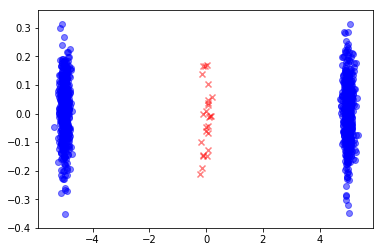

In [3]:
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', alpha=0.5)
plt.scatter(X_anon[:, 0], X_anon[:, 1], c='r', marker='x', alpha=0.5)
plt.show()

Running iteration 1


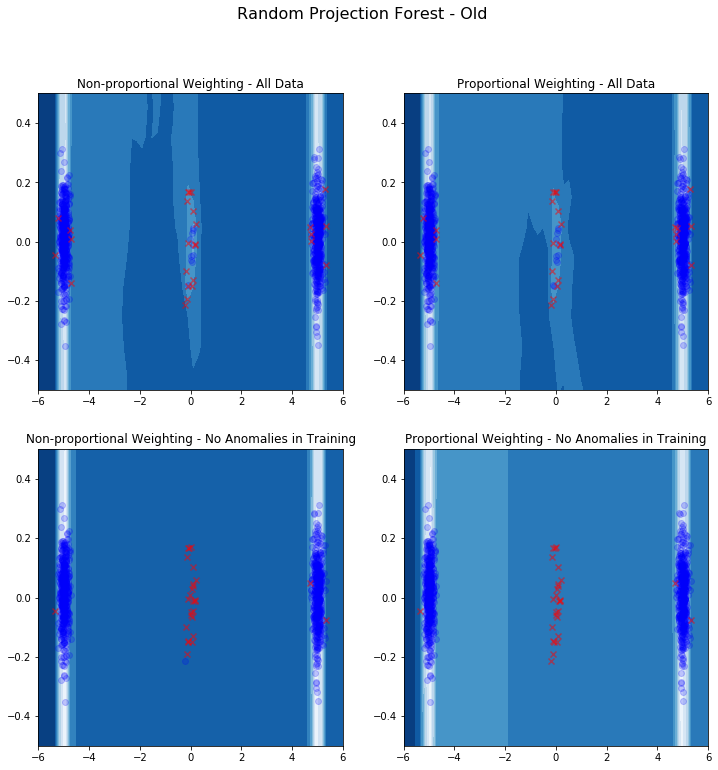

Running iteration 2


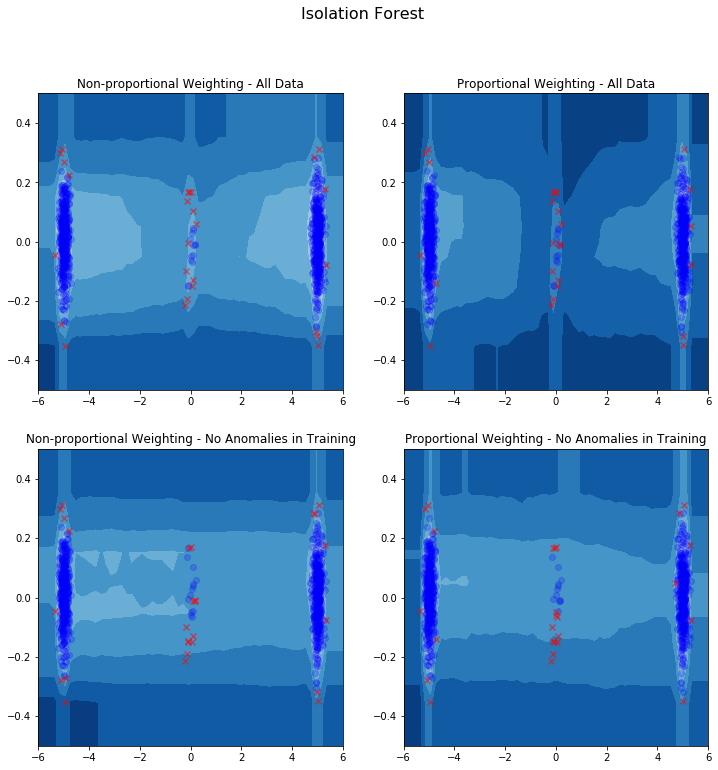

Done!


In [4]:
simulations.run_comparison_simul(X=X, X_anon=X_anon, n_estimators=N_ESTIMATORS, score_at=SCORE_AT, 
                                 classifiers=[planes.RandomProjectionForestOld, iforest.IsolationForest])

In [5]:
rhp = planes.RandomProjectionForestOld(n_estimators=100)
X_all = np.row_stack([X, X_anon])
np.random.shuffle(X_all)

In [6]:
rhp = rhp.fit(X_all)

In [7]:
non_depths = rhp.get_depths(X)
ano_depths = rhp.get_depths(X_anon)

In [8]:
print(np.mean(non_depths), np.mean(ano_depths))

15.47093 9.132


In [9]:
rcf = iforest.IsolationForest(n_estimators=100, method='rcf')
rcf = rcf.fit(X_all)

non_depths = rcf.get_depths(X)
ano_depths = rcf.get_depths(X_anon)
print(np.mean(non_depths), np.mean(ano_depths))

16.26477 9.0588
